# Connect to GD

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


# Cards Image Dataset-Classification
53 classes 7624 train, 265 test, 265 validation images 224 X 224 X 3 jpg format

In [ ]:
%%bash
cd /content/drive/MyDrive/DemHongCau/classifier/data/
ls

14card types-14-(200 X 200)-94.61.h5
53cards-53-(200 X 200)-100.00.h5
cards.csv
test
train
valid



bash: line 2: =: command not found


In [ ]:
#!pip install timm

# import depencies

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
import torchvision.transforms as transforms
from torchvision.datasets import ImageFolder
#import timm

import matplotlib.pyplot as plt #4 data visualize
import pandas as pd
import numpy as np

import os

# 1. Pytorch Dataset

###### make class:
    class PlayingCardDataset(Dataset):
      def __init__(self):
        pass

      def __len__(self):
        pass

      def __getitem__(self):
        pass

In [ ]:
class PlayingCardDataset(Dataset):
  def __init__(self, data_dir, transform=None):
    self.data = ImageFolder(data_dir, transform = transform)

  def __len__(self):
    return len(self.data)

  def __getitem__(self, idx):
    return self.data[idx]

  @property
  def classes(self):
    return self.data.classes

In [ ]:
dataset = PlayingCardDataset(
    data_dir='/content/drive/MyDrive/DemHongCau/classifier/data/train'
)

FileNotFoundError: [Errno 2] No such file or directory: '/content/drive/MyDrive/DemHongCau/classifier/data/train'

In [ ]:
len(dataset)

7634

In [ ]:
dataset[0] #first file of ace of clubs: label0

(<PIL.Image.Image image mode=RGB size=224x224>, 0)

In [ ]:
dataset[121] #first image of ace of diamonds: label1

(<PIL.Image.Image image mode=RGB size=224x224>, 1)

In [ ]:
dataset[500]#label 3

(<PIL.Image.Image image mode=RGB size=224x224>, 3)

0


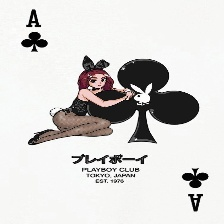

In [ ]:
image, label = dataset[1]# second file of ace of clubs
print(label)
image


In [ ]:
#Get a dictionary associating target values with folder names
data_dir = '/content/drive/MyDrive/DemHongCau/classifier/data/train'
target_to_class = {v:k for k,v in ImageFolder(data_dir).class_to_idx.items()}
print(target_to_class)

{0: 'ace of clubs', 1: 'ace of diamonds', 2: 'ace of hearts', 3: 'ace of spades', 4: 'eight of clubs', 5: 'eight of diamonds', 6: 'eight of hearts', 7: 'eight of spades', 8: 'five of clubs', 9: 'five of diamonds', 10: 'five of hearts', 11: 'five of spades', 12: 'four of clubs', 13: 'four of diamonds', 14: 'four of hearts', 15: 'four of spades', 16: 'jack of clubs', 17: 'jack of diamonds', 18: 'jack of hearts', 19: 'jack of spades', 20: 'joker', 21: 'king of clubs', 22: 'king of diamonds', 23: 'king of hearts', 24: 'king of spades', 25: 'nine of clubs', 26: 'nine of diamonds', 27: 'nine of hearts', 28: 'nine of spades', 29: 'queen of clubs', 30: 'queen of diamonds', 31: 'queen of hearts', 32: 'queen of spades', 33: 'seven of clubs', 34: 'seven of diamonds', 35: 'seven of hearts', 36: 'seven of spades', 37: 'six of clubs', 38: 'six of diamonds', 39: 'six of hearts', 40: 'six of spades', 41: 'ten of clubs', 42: 'ten of diamonds', 43: 'ten of hearts', 44: 'ten of spades', 45: 'three of clu

ImageFolder(data_dir).class_to_idx: Đây là một phần của torchvision.datasets.ImageFolder, một lớp trong PyTorch được sử dụng để tải dữ liệu từ thư mục được tổ chức theo cấu trúc của ImageNet (mỗi thư mục con chứa các hình ảnh của một lớp).

.class_to_idx: Là một thuộc tính của ImageFolder, nó là một từ điển ánh xạ tên của các lớp (tên thư mục) sang các chỉ số của lớp đó.

for k, v in ImageFolder(data_dir).class_to_idx.items(): Duyệt qua từng cặp key-value trong class_to_idx, trong đó k là tên lớp và v là chỉ số của lớp đó.

{v: k for k, v in ...}: Sử dụng comprehensions để tạo ra một từ điển mới, với key là v (chỉ số của lớp) và value là k (tên của lớp). Điều này đang thực hiện việc hoán đổi key và value so với class_to_idx.

Như vậy, đoạn mã này tạo ra một từ điển mới target_to_class, trong đó chỉ số của lớp trở thành key và tên của lớp trở thành giá trị. Nó hữu ích khi bạn muốn chuyển đổi giữa chỉ số và tên của lớp trong quá trình sử dụng mô hình hoặc hiển thị kết quả.

In [ ]:
transform = transforms.Compose([
    transforms.Resize((128,128)),
    transforms.ToTensor(),
])
data_dir = '/content/drive/MyDrive/DemHongCau/classifier/data/train'
dataset = PlayingCardDataset(data_dir, transform)

In [ ]:
dataset[1]

(tensor([[[0.9765, 0.9765, 0.9725,  ..., 0.9686, 0.9686, 0.9647],
          [0.9765, 0.9765, 0.9725,  ..., 0.9686, 0.9686, 0.9647],
          [0.9725, 0.9725, 0.9725,  ..., 0.9647, 0.9686, 0.9647],
          ...,
          [0.9725, 0.9686, 0.9686,  ..., 0.9647, 0.9686, 0.9686],
          [0.9686, 0.9686, 0.9686,  ..., 0.9647, 0.9686, 0.9647],
          [0.9725, 0.9686, 0.9647,  ..., 0.9686, 0.9686, 0.9686]],
 
         [[0.9765, 0.9765, 0.9725,  ..., 0.9686, 0.9686, 0.9647],
          [0.9765, 0.9765, 0.9725,  ..., 0.9686, 0.9686, 0.9647],
          [0.9725, 0.9725, 0.9725,  ..., 0.9647, 0.9686, 0.9647],
          ...,
          [0.9725, 0.9686, 0.9686,  ..., 0.9647, 0.9686, 0.9686],
          [0.9686, 0.9686, 0.9686,  ..., 0.9647, 0.9686, 0.9647],
          [0.9725, 0.9686, 0.9647,  ..., 0.9686, 0.9686, 0.9686]],
 
         [[0.9686, 0.9686, 0.9647,  ..., 0.9608, 0.9608, 0.9569],
          [0.9686, 0.9686, 0.9647,  ..., 0.9608, 0.9608, 0.9569],
          [0.9647, 0.9647, 0.9647,  ...,

In [ ]:
image, label = dataset[1]
print(label)
image.shape


0


torch.Size([3, 128, 128])

### DataLoader
> batching our dataset

In [ ]:
dataloader = DataLoader(dataset, batch_size=32, shuffle=True)

In [ ]:
for images, label in dataloader:
  break

In [ ]:
images.shape, label

(torch.Size([32, 3, 128, 128]),
 tensor([23,  2, 30, 35, 33,  4, 26, 35, 17, 27,  7, 46, 27, 25,  5,  4, 16, 16,
         27,  9, 20, 48, 11, 35,  6, 44, 32, 52, 15, 10,  0,  9]))

# 2. Pytorch Model
pytorch datasets have a structed qay if organixing your data, pytorch models folow a similar paradigm.

> we could create th model from scratch defining each layer.

> However for tasks like image classification, many of the state of the art architectures are readily available and we can import them from packages like timm.

> understanding the pytorch model is all about understanding the shape the data is at each layer, and the main one we need to modify for a task is the final layer. Here we have 53 targets, so we will modify the last layer for this.

In [ ]:
class SimpleCardClassifier(nn.Module):
  def __init__(self, num_class=53):
    #where we define all the parts of the model
    self.base_module = timm.create_module('efficient_b0', pretrained = True)
    enet_out_size = 1280

  def forward(self, x):
    #connect these parts and return the output
    return output

# 3. Pytorch Training Loop